In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class projectile_drag:
    
    def __init__(self, angle, v0, time, interval):
        self.angle= angle
        self.v0= v0
        self.time= time
        self.interval= interval
        
        global x_list, y_list, vx_list, vy_list
        x_list, y_list, vx_list, vy_list= self.projectile_drag()
        
    def projectile_drag(self):
        t= np.linspace(0, self.time, self.interval)
        dt=t[1]-t[0]
        
        g= 9.8 #m/s^2
        m= 1 #kg
        Cd= 0.005
        
        v0= self.v0
        vx= v0*np.cos(self.angle)
        vy= v0*np.sin(self.angle)
        
        x0=0
        y0=0
        vd_x=0 #X dir Velocity decrease due to drag
        vd_y=0 #Y dir velocity decrease due to drag and gravity
    
        #List of position coordinates
        x_list=[x0]
        y_list=[y0]
        
        #List of Velocity values at different times
        vx_list=[vx]
        vy_list=[vy]
        
        for i in range(len(t)):
            #Acceleration of X dir & Y dir
            ay= -g -Cd*v0*vy/m
            ax= -Cd*v0*vx/m
            
            #Updating Velocity after dt increase in time
            vd_y= ay*dt
            vy+= vd_y
            y0+= vy*dt
            
            vd_x= ax*dt
            vx+= vd_x
            x0+= vx*dt
            
            v0=np.sqrt(vx**2+vy**2)
        
            if y0>0:
                y_list.append(y0)
                x_list.append(x0)
                vx_list.append(vx)
                vy_list.append(vy)
        
            else:
                break
        return x_list, y_list, vx_list,vy_list
    
    def plotTrajectory(self):
        #x_list, y_list, vx_list, vy_list= self.projectile_drag()
        
        plt.subplots(figsize=(8,6))
        plt.plot(x_list, y_list, color='red')

        plt.xlabel("X Coordinate (m)", fontweight='bold', size=14)
        plt.ylabel("Y Coordinate (m)", fontweight='bold',size=15)
        plt.title('Trajectory of Projectile with Air Drag', fontweight='bold')
        plt.ylim(0, max(y_list)+2)
        
        plt.grid(True)
        plt.show();
        
    def projRange(self):
        return x_list[::-1][0]
    
    def plotVx(self):
        #x_list, y_list, vx_list, vy_list= self.projectile_drag()
        
        plt.subplots(figsize=(8,6))
        plt.plot(np.linspace(0,30,900)[:len(vx_list)], vx_list, color='darkblue')

        plt.title("$v_x$ (m/s) v/s Time (s)", fontweight='bold')
        plt.xlabel("Time", fontweight='bold', size=14)
        plt.ylabel("X component of Velocity", fontweight='bold', size=15)
                
        plt.grid(True)
        plt.show();
        
    def plotVy(self):
        #x_list, y_list, vx_list, vy_list= self.projectile_drag()
        
        plt.subplots(figsize=(8,6))
        plt.plot(np.linspace(0,30,900)[:len(vy_list)], vy_list, color='darkblue')

        plt.title("$v_y$ (m/s) v/s Time (s)", fontweight='bold')
        plt.xlabel("Time", fontweight='bold', size=14)
        plt.ylabel("Y component of Velocity", fontweight='bold', size=15)
        plt.ylim(min(vy_list)-5, max(vy_list)+5)
        
        plt.grid(True)
        plt.show();
    

Projectile Range is 57.716


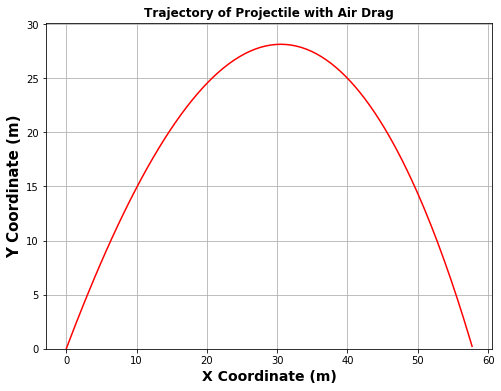

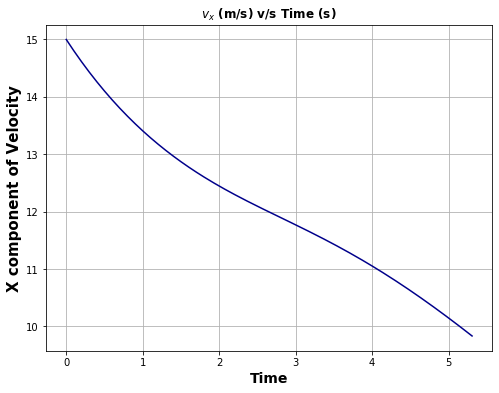

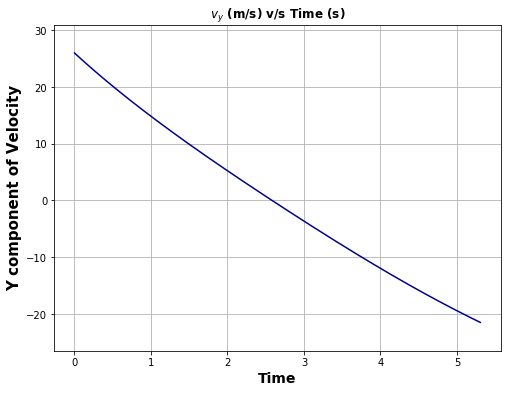

In [4]:
#Plotting Projectile Trajectory
p= projectile_drag(np.pi/3,30,30,1000)

print("Projectile Range is %.3f"%p.projRange())
p.plotTrajectory()
p.plotVx()
p.plotVy()